# Análise de Ruido AWGN em um tom senoidal
Nessa prática, foi analisado um sinal senoidal contaminado com ruiído branco. A análise baseia-se na análise espectral desse sinal contaminado com ruído, e seu parâmetro estatístico de autocovariância normalizada:

### Primeiro, vamos realizar essa prática em ambiente Matlab:

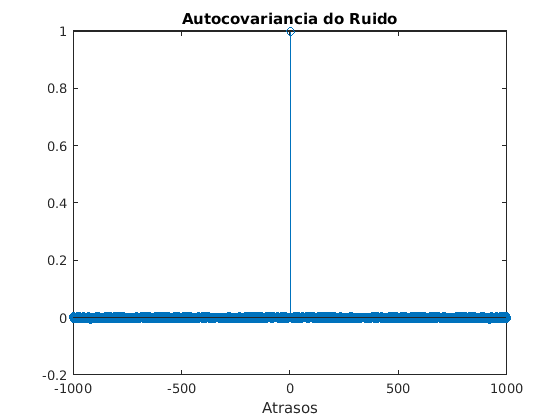

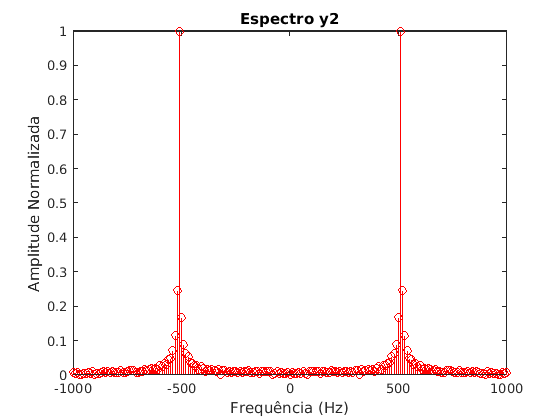

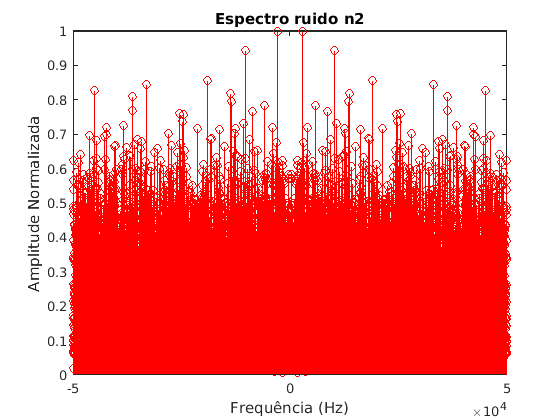

In [16]:
%% AWGN real
clc;clear all;close all;
% Parâmetros
SNR_dB = 10;                              % Determina o valor da SNR em dB
Ts=0.00001;
Fs=1/Ts;
t = 0:Ts:5;                           % Eixo do tempo
A = 2;                                % Amplitude do sinal de entrada x(t)
x=A*cos(2*pi*512*t);                  % Sinal qualquer x(t)
N = length(x);
%
% Gerar ruído com a função awgn.m
y2 =  awgn(x,SNR_dB,'measured');
%
% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
pTx = sum(abs(x.^2))/N;                   % Potência do sinal x(t)
n2 = y2-x;
potN2 = sum(abs(n2.^2))/N;                % Potência estimada do ruído
SNR2 = pTx/potN2;                         % Estimação da SNR linear
SNR2 = 10*log10(SNR2);                    % SNR em dB
%Análise Espectral
lfft=10000;
%Construção do Single-sided amplitude spectrum
yfft=fftshift(fft(n2,lfft));                                          %Utilizando a função built-in
yfft2=fftshift(fft(y2,lfft));
freq=[-Fs/2:Fs/lfft:Fs/2-Fs/lfft];
%yfftuni = abs(yfft(1:lfft/2));
%yfftuni = abs(yfft(1:lfft/2));
figure(1);
stem(freq,abs(yfft)/max(abs(yfft)),'r');
title('Espectro ruido n2');
xlabel('Frequência (Hz)');
ylabel('Amplitude Normalizada');
figure(2)
stem(freq,abs(yfft2)/max(abs(yfft2)),'r');
title('Espectro y2');
xlabel('Frequência (Hz)');
ylabel('Amplitude Normalizada');
xlim([-1000,1000])
%%
%Calculando autocovariancia normalizada
maxlag = length(t);
[c,lags] = xcov(n2,1000,'coeff');
figure(3)
stem(lags,c)
title('Autocovariancia do Ruido')
xlabel('Atrasos')

Nas dus figuras podemos observar duas características importantes do ruido branco: a sua distribuição de potência uniforme por todo o espectro e sua independência estatística. Vê-se no gráfico da autocovariancia que, exceto no ponto de atraso = 0, todos os valores assumem o nível de 0 covariância.

Se quisermos ouvir esse tipo de sinal, vamos ver sua semelhança com o que ouvimos em rádios e Tvs analógicas quando o sinal não está muito bem sintonizado, o famoso 'chiado'

In [17]:
p=audioplayer(y2,1/Ts);
play(p);

### Agora, o experimento em Python:

Estimação de SNR: 
   SNR de entrada: 10 dB
   SNR de entrada: 9.977817222064969 dB


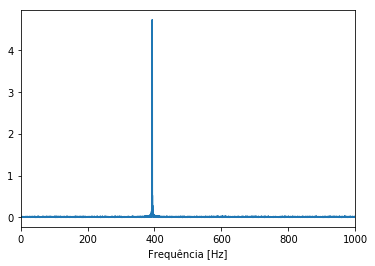

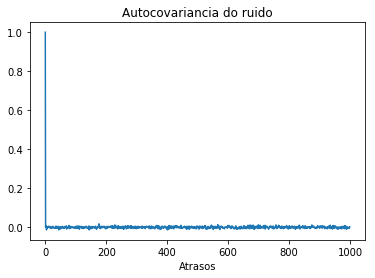

In [2]:
# AWGN_Real.m
## Parâmetros
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import fftpack 
import scipy.io.wavfile as wv
#
SNR_dB = 10     
#Ts=0.0001                           # Determina o valor da SNR em dB
Fs=15*512
Ts=1/Fs
t = np.arange(0,5+Ts,0.0001)                      # Eixo do tempo
A = 15                                         # Amplitude do sinal de entrada x(t)
x=A*np.cos(2*np.pi*512*t)                       # Sinal qualquer x(t)
#
## Montagem do vetor ruído 
N = len(x)                                     # Calcula o comprimento de x
Ps = np.sum(np.abs(x)**2)/N                    # Calcula a potência do sinal
SNR = 10**(SNR_dB/10)                          # Calcula a SNR linear
Pn = Ps/SNR                                    # Calcula a potência do ruído
noiseSigma = np.sqrt(Pn)                       # Desvio padrão  para ruído AWGN (amostras reais)
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,N)       # Amostras de ruído 
y = x + n                                      # Sinal Ruidoso
#
# Estimação da SNR pelas amostras do sinal recebido
pTx = (np.linalg.norm(x)**2)/N                 # Potência do sinal x(t)
pNe = (np.linalg.norm(n)**2)/N                 # Potência estimada do ruído
SNR1 = pTx/pNe;                                # Estimação da SNR linear
SNR1= 10*np.log10(SNR1)                        # SNR em dB
#
# Mostrar informações
print('Estimação de SNR: ')
print('   SNR de entrada: {} dB'.format(SNR_dB))
print('   SNR de entrada: {} dB'.format(SNR1))

#Analise Frequencial
lfft = len(y)                                           # Comprimento do sinal DSB
lfft = int(2**np.ceil(np.log2(lfft)))                      # Comprimento do sinal em potencia de 2
freq=np.arange(-Fs/2,Fs/2,Fs/lfft)                         # Eixo das frequências
espectro=np.abs(fftpack.fftshift(fftpack.fft(y,lfft)))/lfft     # FFT da onda modulante original
plt.figure(1)
plt.plot(freq,espectro)
plt.xlabel('Frequência [Hz]')
plt.xlim([0,1000])
#plt.stem(freq,espectro)

#Analise da autocovariancia normalizada:
a_cov=sm.tsa.stattools.acovf(n)
plt.figure(2)
nlags=np.arange(0,1000)
plt.plot(nlags,a_cov[0:1000]/np.max(a_cov))
plt.title('Autocovariancia do ruido')
plt.xlabel('Atrasos')
plt.show()
#Ouvindo os sinais:
wv.write('./original.wav',int(Fs),x.astype('int16'))
wv.write('./com_ruido.wav',int(Fs),y.astype('int16'))
wv.write('./ruido.wav',int(Fs),n.astype('int16'))


Para a estimação da autocovariância, foi necessária a instalação do pacote *statsmodels*, que possui a funcionalidade requerida

# Estimação de SNR
Nessa prática, recebemos as amostras de um sinal ruidoso na recepção e os parâmetros do sinal original transmitido. A partir daí, buscamos estabelecer o nível de SNR desse sinal

Primeiro, vamos estimar a SNR de um tom senoidal simples, expresso por $y(t) = A_m\cos(2\pi f_m t)$. Seus parâmetros e amostras são fornecidos no arquivo *Pratica_08_sinal_real.mat*

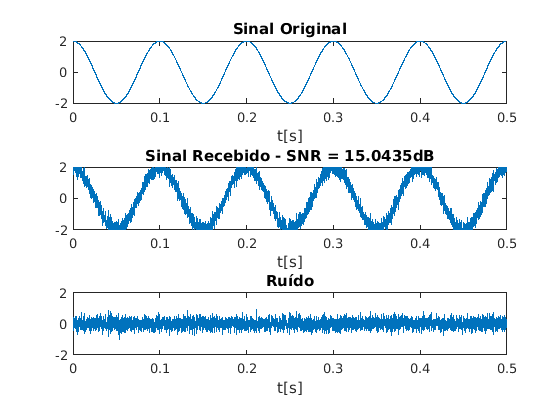

In [1]:
%Estimar SNR de sinais recebidos com ruido
%Tenho informações do sinal enviado (Am,fm) -> consigo encontrar a potencia
%do sinal enviado
%Calculo a potencia do sinal recebido (y=x+n)
% n=y-x ...

clear all; clc; close all;
load('Pratica_08_sinal_real.mat')
N=length(y);
t=0:1/fs:(N-1)/fs;   
x_orig=Am*cos(2*pi*fm*t); %Sinal original
%Calcular Potência do Sinal Original:
Px = sum(abs(x_orig).^2)/N;
%O sinal y corresponde a y=x+n -> n=y-x
n=y-x_orig;
%Potencia do ruido n:
Pn=sum(abs(n).^2)/N;
%Determinando SNR:
SNR=Px/Pn;
SNR_dB=10*log10(SNR);
%%
%Plotagens
figure(1)
subplot(3,1,1);
plot(t,x_orig);
title('Sinal Original');
xlabel('t[s]');
subplot(3,1,2);
plot(t,y);
title(['Sinal Recebido - SNR = ' num2str(SNR_dB) 'dB']);
xlabel('t[s]');
ylim([-2 2])
subplot(3,1,3);
plot(t,n);
xlabel('t[s]');
title('Ruído');

Na segunda parte, devemos estimar a SNR de um sinal senoidal complexo, expresso por: $y(t) = A_r\cos(2\pi f_mt)+jA_i\cos(2\pi f_mt)$. Novamente, esse sinal está salvo em um arquivo *.mat*

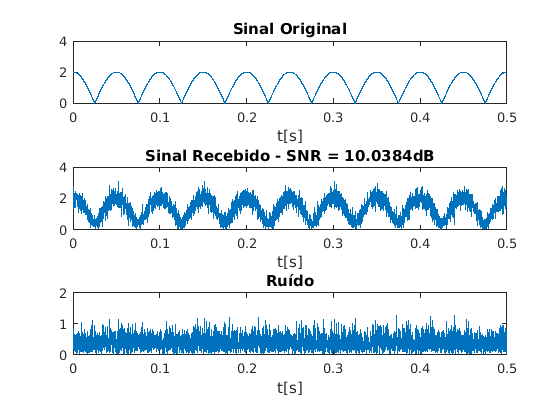

In [4]:
clear all; clc; close all;
load('Pratica_08_sinal_complexo.mat')
N=length(y);
t=0:1/fs:(N-1)/fs;   
x_orig=Ar*cos(2*pi*fm*t)+1i*Ai*cos(2*pi*fm*t); %Sinal original
%Calcular Potência do Sinal Olriginal:
Px = sum(abs(x_orig).^2)/N;
%O sinal y corresponde a y=x+n -> n=y-x
n=y-x_orig;
%Potencia do ruido n:
Pn=sum(abs(n).^2)/N;
%Determinando SNR:
SNR=Px/Pn;
SNR_dB=10*log10(SNR);
%%
%Plotagens
figure(1)
subplot(3,1,1);
plot(t,abs(x_orig));
title('Sinal Original');
xlabel('t[s]');
subplot(3,1,2);
plot(t,abs(y));
title(['Sinal Recebido - SNR = ' num2str(SNR_dB) 'dB']);
xlabel('t[s]');
%ylim([-2 2])
subplot(3,1,3);
plot(t,abs(n));
xlabel('t[s]');
title('Ruído');


### O mesmo experimento, em Python:
Tom senoidal:

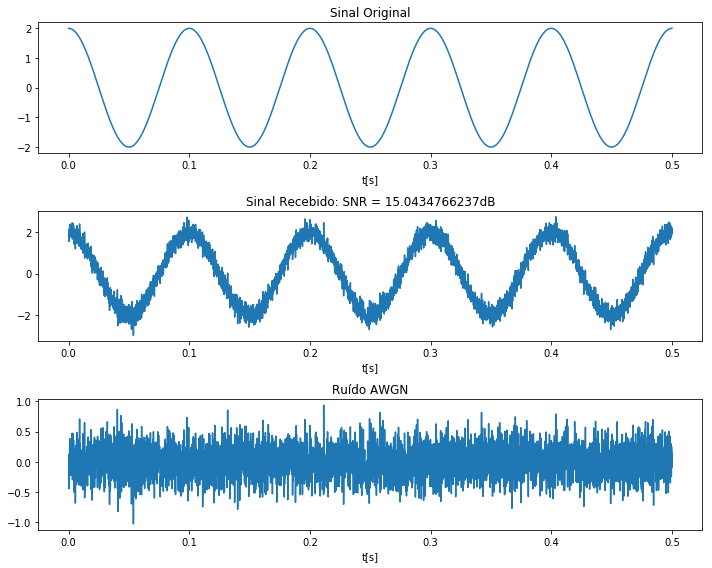

In [4]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
#Carregando parametros
variaveis = loadmat('./Pratica_08_sinal_real.mat')
Am=int(variaveis['Am'])
fm=int(variaveis['fm'])
fs=int(variaveis['fs'])
y=variaveis['y'].flatten()
N=len(y)
t=np.arange(0,N/fs,1/fs)
#Construindo Sinal Original
x_orig=Am*np.cos(2*np.pi*fm*t)
#Calculando Potencia do sinal original
P_x=(np.linalg.norm(x_orig)**2)/N
#Como y=x+n => n=y-x
n=y-x_orig
P_n=(np.linalg.norm(n)**2)/N
SNR=P_x/P_n
SNR_dB=10*np.log10(SNR)
#Plotagens
plt.figure(1,[10,8])
plt.subplot(3,1,1)
plt.plot(t,x_orig)
plt.title('Sinal Original')
plt.xlabel('t[s]')
plt.subplot(3,1,2)
plt.plot(t,y)
plt.title('Sinal Recebido: SNR = ' + str(SNR_dB) + 'dB')
plt.xlabel('t[s]')
plt.subplot(3,1,3)
plt.plot(t,n)
plt.title('Ruído AWGN')
plt.xlabel('t[s]')
plt.tight_layout()
plt.show()

Observar que o valor estimado tanto e Python quanto Matlab são os mesmos: 15.04 dB

Agora, para o sinal complexo:

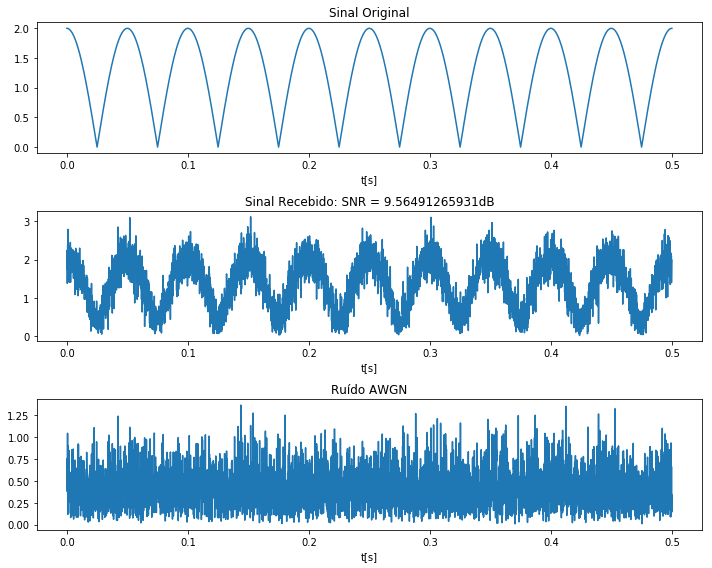

In [6]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
#Carregando parametros
variaveis = loadmat('./Pratica_08_sinal_complexo.mat')
Ar=int(variaveis['Ar'])
Ai=int(variaveis['Ai'])
fm=int(variaveis['fm'])
fs=int(variaveis['fs'])
y=variaveis['y'].flatten()
N=len(y)
t=np.arange(0,N/fs,1/fs)
#Construindo Sinal Original
x_orig=Ar*np.cos(2*np.pi*fm*t)+1j*Ai*np.cos(2*np.pi*fm*t)
#Calculando Potencia do sinal original
P_x=(np.linalg.norm(x_orig)**2)/N
#Como y=x+n => n=y-x
n=y-x_orig
P_n=(np.linalg.norm(n)**2)/N
SNR=P_x/P_n
SNR_dB=10*np.log10(SNR)
#Plotagens
plt.figure(1,[10,8])
plt.subplot(3,1,1)
plt.plot(t,np.abs(x_orig))
plt.title('Sinal Original')
plt.xlabel('t[s]')
plt.subplot(3,1,2)
plt.plot(t,np.abs(y))
plt.title('Sinal Recebido: SNR = ' + str(SNR_dB) + 'dB')
plt.xlabel('t[s]')
plt.subplot(3,1,3)
plt.plot(t,np.abs(n))
plt.title('Ruído AWGN')
plt.xlabel('t[s]')
plt.tight_layout()
plt.show()

Dessa vez, o observamos uma pequena diferença entre o estimado para esse sinal pelo Python(9,56 DB) e pelo Matlab (10,03dB)